WATER JUG PROBLEM


In [ ]:
from collections import deque

def BFS(a, b, target):
    m = {}
    isSolvable = False
    path = []
    q = deque()
    q.append((0, 0))

    while (len(q) > 0):
        u = q.popleft()
        if ((u[0], u[1]) in m):
            continue
        if ((u[0] > a or u[1] > b or
            u[0] < 0 or u[1] < 0)):
            continue
        path.append([u[0], u[1]])
        m[(u[0], u[1])] = 1
        if (u[0] == target or u[1] == target):
            isSolvable = True
            if (u[0] == target):
                if (u[1] != 0):
                    path.append([u[0], 0])
            else:
                if (u[0] != 0):
                    path.append([0, u[1]])
            sz = len(path)
            for i in range(sz):
                print("(", path[i][0], ",",
                    path[i][1], ")")
            break
        q.append([u[0], b])
        q.append([a, u[1]])
        for ap in range(max(a, b) + 1):
            c = u[0] + ap
            d = u[1] - ap
            if (c == a or (d == 0 and d >= 0)):
                q.append([c, d])
            c = u[0] - ap
            d = u[1] + ap
            if ((c == 0 and c >= 0) or d == b):
                q.append([c, d])
        q.append([a, 0])
        q.append([0, b])
    if (not isSolvable):
        print("No solution")

if __name__ == '__main__':
    Jug1, Jug2, target = 4, 3, 2
    print("Path from initial state to solution state :")
    BFS(Jug2, Jug1, target)


Path from initial state to solution state :
( 0 , 0 )
( 0 , 4 )
( 3 , 0 )
( 3 , 4 )
( 3 , 1 )
( 0 , 3 )
( 3 , 3 )
( 2 , 4 )
( 2 , 0 )


S ALGO


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
data=pd.DataFrame({"Samples":[1,2,3,4,5],
                   "Fever":["Yes","No","Yes","No","Yes"],
                   "Cough":["Yes","Yes","Yes","No","Yes"],
                   "Difficulty Breathing":["No","No","Yes","No","Yes"],
                   "Diagnosed Disease":["Pneumonia","Common Cold","Pneumonia","Healthy",
                                        "Pneumonia"]})
data

,Samples,Fever,Cough,Difficulty Breathing,Diagnosed Disease
0,1,Yes,Yes,No,Pneumonia
1,2,No,Yes,No,Common Cold
2,3,Yes,Yes,Yes,Pneumonia
3,4,No,No,No,Healthy
4,5,Yes,Yes,Yes,Pneumonia


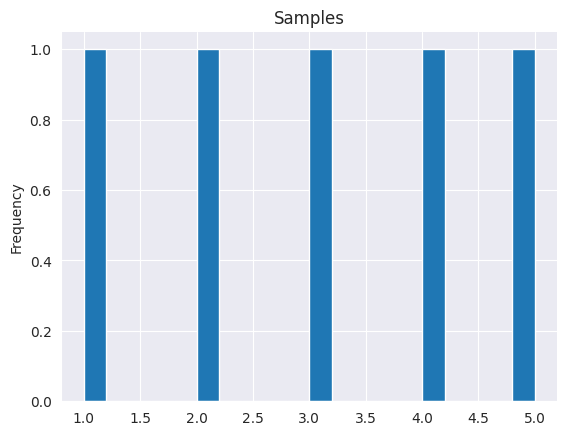

In [ ]:
from matplotlib import pyplot as plt
data['Samples'].plot(kind='hist', bins=20, title='Samples')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
target="Pneumonia"
symptoms=["Fever","Cough","Difficulty Breathing"]
filter=data[data["Diagnosed Disease"]==target]
print(filter)

   Samples Fever Cough Difficulty Breathing Diagnosed Disease
0        1   Yes   Yes                   No         Pneumonia
2        3   Yes   Yes                  Yes         Pneumonia
4        5   Yes   Yes                  Yes         Pneumonia


In [ ]:
total=filter.shape[0]
print(total)

3


In [ ]:
pos = filter[(filter["Fever"] == "Yes") & (filter["Cough"] == "Yes") & (filter["Difficulty Breathing"] == "Yes")].shape[0]
print(pos)

TypeError: 'type' object is not subscriptable

In [ ]:
print(f"Rule: If a patient has {', '.join(symptoms)}, then they are likely to have {target}")

NameError: name 'symptoms' is not defined

In [ ]:
support = pos/total
print(f"Support : {support:.2f}")

Support : 0.67


In [ ]:
confidence=pos/data[(data["Fever"] == "Yes") & (data["Cough"] == "Yes") & (data["Difficulty Breathing"] == "Yes")].shape[0]
print(f"Confidence : {confidence:.2f}")

Confidence : 1.00


candidate elimination

In [ ]:
import numpy as np

class CandidateElimination:
    def __init__(self, num_features):
        # Initialize the most specific and most general hypotheses
        self.S = ['0'] * num_features
        self.G = ['?'] * num_features

    def specialize_G(self, example):
        # Specialize the most general hypothesis based on a positive example
        for i in range(len(self.G)):
            if self.G[i] == '?':
                self.G[i] = example[i]
            elif self.G[i] != example[i]:
                self.G[i] = '?'

    def generalize_S(self, example):
        # Generalize the most specific hypothesis based on a negative example
        for i in range(len(self.S)):
            if self.S[i] != example[i] and self.S[i] != '0':
                self.S[i] = '?'

    def fit(self, examples):
        for example in examples:
            label = example[-1]  # Last element is the label
            if label == 'Yes':
                self.specialize_G(example[:-1])  # Update G for positive example
            else:
                self.generalize_S(example[:-1])  # Update S for negative example

    def get_final_hypothesis(self):
        return self.S, self.G

# Example dataset
examples = [
    ['Big', 'Red', 'Circle', 'No'],
    ['Small', 'Red', 'Triangle', 'No'],
    ['Small', 'Red', 'Circle', 'Yes'],
    ['Big', 'Blue', 'Circle', 'No']
]

# Initialize CandidateElimination object
ce = CandidateElimination(num_features=len(examples[0]) - 1)  # -1 for excluding label

# Fit the data
ce.fit(examples)

# Get the final hypothesis
final_specific_hypothesis, final_general_hypothesis = ce.get_final_hypothesis()

print("Final Specific Hypothesis:", final_specific_hypothesis)
print("Final General Hypothesis:", final_general_hypothesis)


Final Specific Hypothesis: ['0', '0', '0']
Final General Hypothesis: ['Small', 'Red', 'Circle']


In [ ]:
data = [
    ('Big', 'Red', 'Circle', 'No'),
    ('Small', 'Red', 'Triangle', 'No'),
    ('Small', 'Red', 'Circle', 'Yes'),
    ('Big', 'Blue', 'Circle', 'No'),
    ('Small', 'Blue', 'Circle','Yes')
]
def get_domains(data):
    d = [set() for i in data[0]]
    for x in data:
        for i, xi in enumerate(x):
            d[i].add(xi)
    return [list(sorted(x)) for x in d]
get_domains(data)
def g_0(n):
    return ('?',)*n

def s_0(n):
    return ('Phi',)*n
def more_general(h1, h2):
    more_general_parts = []
    for x, y in zip(h1, h2):
        mg = x == '?' or (x != 'Phi' and (x == y or y == 'Phi'))
        more_general_parts.append(mg)
    return all(more_general_parts)

def consistent(hypothesis,example):
    return more_general(hypothesis, example)

def min_generalizations(h, x):
    h_new = list(h)
    for i in range(len(h)):
        if not consistent(h[i:i+1],x[i:i+1]):
            if h[i] != 'Phi':
                h_new[i] = '?'
            else:
                h_new[i] = x[i]
    return [tuple(h_new)]

def generalize_S(x, G, S):
    S_prev = list(S)
    for s in S_prev:
        if s not in S:
            continue
        if not consistent(s,x):
            S.remove(s)
            Splus = min_generalizations(s, x)
            S.update([h for h in Splus if any([more_general(g,h)
                                               for g in G])])

            S.difference_update([h for h in S if
                                 any([more_general(h, h1)
                                      for h1 in S if h != h1])])
    return S

def min_specializations(h, domains, x):
    results = []
    for i in range(len(h)):
        if h[i] == '?':
            for val in domains[i]:
                if x[i] != val:
                    h_new = h[:i] + (val,) + h[i+1:]
                    results.append(h_new)
        elif h[i] != 'Phi':
            h_new = h[:i] + ('Phi',) + h[i+1:]
            results.append(h_new)
    return results

def specialize_G(x, domains, G, S):
    G_prev = list(G)
    for g in G_prev:
        if g not in G:
            continue
        if consistent(g,x):
            G.remove(g)
            Gminus = min_specializations(g, domains, x)
            G.update([h for h in Gminus if any([more_general(h, s)
                                                for s in S])])
            G.difference_update([h for h in G if
                                 any([more_general(g1, h)
                                      for g1 in G if h != g1])])
    return G

def candidate_elimination(examples):
    domains = get_domains(examples)[:-1]

    G = set([g_0(len(domains))])
    S = set([s_0(len(domains))])
    i=0
    print('All the hypotheses in General and Specific boundary are:\n')
    print('\n G[{0}]:'.format(i),G)
    print('\n S[{0}]:'.format(i),S)
    for xcx in examples:
        i=i+1
        x, cx = xcx[:-1], xcx[-1]
        if cx=='Yes':
            G = {g for g in G if consistent(g,x)}
            S = generalize_S(x, G, S)
        else:
            S = {s for s in S if not consistent(s,x)}
            G = specialize_G(x, domains, G, S)
        print('\n G[{0}]:'.format(i),G)
        print('\n S[{0}]:'.format(i),S)
    return
candidate_elimination(data)


All the hypotheses in General and Specific boundary are:


 G[0]: {('?', '?', '?')}

 S[0]: {('Phi', 'Phi', 'Phi')}

 G[1]: {('?', 'Blue', '?'), ('Small', '?', '?'), ('?', '?', 'Triangle')}

 S[1]: {('Phi', 'Phi', 'Phi')}

 G[2]: {('Small', '?', 'Circle'), ('?', 'Blue', '?'), ('Big', '?', 'Triangle')}

 S[2]: {('Phi', 'Phi', 'Phi')}

 G[3]: {('Small', '?', 'Circle')}

 S[3]: {('Small', 'Red', 'Circle')}

 G[4]: {('Small', '?', 'Circle')}

 S[4]: {('Small', 'Red', 'Circle')}

 G[5]: {('Small', '?', 'Circle')}

 S[5]: {('Small', '?', 'Circle')}


In [ ]:
def get_domains(data):
    return [sorted(set(x)) for x in zip(*data)]

def g_0(n):
    return ('?',) * n

def s_0(n):
    return ('Phi',) * n

def more_general(h1, h2):
    return all(x == '?' or x != 'Phi' and (x == y or y == 'Phi') for x, y in zip(h1, h2))

def consistent(hypothesis, example):
    return more_general(hypothesis, example)

def min_generalizations(h, x):
    return [(x_val if h_val == 'Phi' else '?') if not consistent([h_val], [x_val]) else h_val for h_val, x_val in zip(h, x)]

def generalize_S(x, G, S):
    for s in list(S):
        if not consistent(s, x):
            S.remove(s)
            S.update(h for h in [min_generalizations(s, x)] if any(more_general(g, h) for g in G))
            S.difference_update(h for h in S if any(more_general(h, h1) for h1 in S if h != h1))
    return S

def min_specializations(h, domains, x):
    return [h[:i] + (val,) + h[i + 1:] for i, val in enumerate(domains) if h[i] == '?' and x[i] != val] + \
           [('Phi',) * i + (val,) + ('Phi',) * (len(h) - i - 1) for i, val in enumerate(h) if val != 'Phi']

def specialize_G(x, domains, G, S):
    for g in list(G):
        if consistent(g, x):
            G.remove(g)
            G.update(h for h in min_specializations(g, domains, x) if any(more_general(h, s) for s in S))
            G.difference_update(h for h in G if any(more_general(g1, h) for g1 in G if h != g1))
    return G

def candidate_elimination(examples):
    domains = get_domains(examples)[:-1]
    G = {g_0(len(domains))}
    S = {s_0(len(domains))}
    i = 0
    print('All the hypotheses in General and Specific boundary are:\n')
    print('\n G[{0}]:'.format(i), G)
    print('\n S[{0}]:'.format(i), S)
    for xcx in examples:
        i += 1
        x, cx = xcx[:-1], xcx[-1]
        if cx == 'Yes':
            G = {g for g in G if consistent(g, x)}
            S = generalize_S(x, G, S)
        else:
            S = {s for s in S if not consistent(s, x)}
            G = specialize_G(x, domains, G, S)
        print('\n G[{0}]:'.format(i), G)
        print('\n S[{0}]:'.format(i), S)
    return

data = [
    ('Big', 'Red', 'Circle', 'No'),
    ('Small', 'Red', 'Triangle', 'No'),
    ('Small', 'Red', 'Circle', 'Yes'),
    ('Big', 'Blue', 'Circle', 'No'),
    ('Small', 'Blue', 'Circle', 'Yes')
]

candidate_elimination(data)


All the hypotheses in General and Specific boundary are:


 G[0]: {('?', '?', '?')}

 S[0]: {('Phi', 'Phi', 'Phi')}


TypeError: unhashable type: 'list'

ID3


In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Read the dataset
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/NNML/house_purchase.xlsx')

# Check the columns of the DataFrame
print(df.columns)

# Define the entropy function
def entropy(s):
    p = [(s == c).mean() for c in set(s)]
    return sum([-pi * np.log2(pi) for pi in p if pi != 0])


# Define the information gain function
def info_gain(data, attribute, target):
    totalE = entropy(data[target])
    vals, counts = np.unique(data[attribute], return_counts=True)
    wt = np.sum([(counts[i] / np.sum(counts)) * entropy(data.where(data[attribute] == val).dropna()[target]) for i, val in enumerate(vals)])
    return totalE - wt

# Define the ID3 algorithm
def id3(data, og, features, target, parent_node_class=None):
    if len(np.unique(data[target])) <= 1:
        return np.unique(data[target])[0]
    elif len(data) == 0:
        return np.unique(og[target])[np.argmax(np.unique(og[target], return_counts=True)[1])]
    elif len(features) == 0:
        return parent_node_class
    else:
        parent_node_class = np.unique(data[target])[np.argmax(np.unique(data[target], return_counts=True)[1])]
    item = [info_gain(data, feature, target) for feature in features]
    bestI = np.argmax(item)
    bestF = features[bestI]
    tree = {bestF: {}}
    features = [i for i in features if i != bestF]
    for value in np.unique(data[bestF]):
        value = value
        sub = data.where(data[bestF] == value).dropna()
        subtree = id3(sub, df, features, target, parent_node_class)
        tree[bestF][value] = subtree
    return tree

# Define the predict function
def predict(query, tree):
    for key in list(query.keys()):
        if key in list(tree.keys()):
            try:
                result = tree[key][query[key]]
            except:
                return "Cannot make a prediction"
            result = tree[key][query[key]]
            if isinstance(result, dict):
                return predict(query, result)
            else:
                return result

# Define the query dictionary
query = {'Age': 30, 'Income': 50000, 'Gender': 'Male', 'MaritalStatus': 'Single'}

# Define features and target
features = ['Age', 'Income', 'Gender', 'MaritalStatus']
target = 'Buy'

# Build the decision tree
tree = id3(df, df, features, target)

# Predict the class label
prediction = predict(query, tree)
print("Predicted class label:", prediction)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['Age', 'Income', 'Gender', 'MaritalStatus', 'Buy'], dtype='object')
Predicted class label: N


In [ ]:
import pandas as pd

# Creating a more varied dataset
data = pd.DataFrame({
    'Weather': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Mild', 'Cool', 'Mild'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Strong'],
    'PlayTennis': ['Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No']
})

# Step 1: Initialize h to the most specific hypothesis in H
hypothesis = pd.Series(['ϕ'] * (len(data.columns) - 1), index=data.columns[:-1])

# Display the initial hypothesis
print("Step 1: Initial Hypothesis")
print(hypothesis, "\n")

# Step 2: Iterate through positive examples
for index, row in data.iterrows():
    if row['PlayTennis'] == 'Yes':
        for attribute in data.columns[:-1]:
            # If the constraint ai is satisfied by x, do nothing
            if hypothesis[attribute] == 'ϕ' or hypothesis[attribute] == row[attribute]:
                pass
            # Replace ai in h with the next more general constraint that is satisfied by x
            else:
                hypothesis[attribute] = '?'

# Display the final hypothesis
print("Step 3: Final Hypothesis")
print(hypothesis)


NAIVE BAYES CLASSIFICATION


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

sn.set_style("darkgrid")

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/NNML/BreastCancerData.csv')
data.head(10)


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


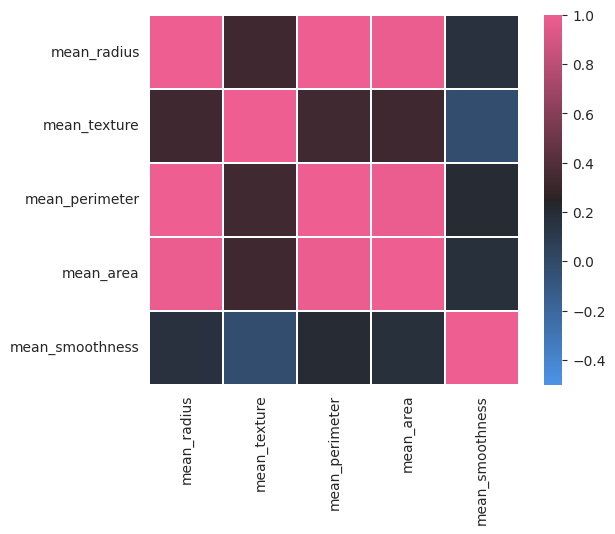

In [ ]:
#EDA
corr = data.iloc[:, :-1].corr(method='pearson')
cmap = sn.diverging_palette(250, 354, 80, 60, center='dark', as_cmap=True)

sn.heatmap(corr, vmax=1, vmin=-0.5, cmap=cmap, square=True, linewidths=0.2)
plt.show()


In [ ]:
#correlation pearson
data = data[['mean_radius', 'mean_texture', 'mean_smoothness', 'diagnosis']]
data.head(10)


,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0
5,12.45,15.70,0.12780,0
6,18.25,19.98,0.09463,0
7,13.71,20.83,0.11890,0
8,13.00,21.82,0.12730,0
9,12.46,24.04,0.11860,0


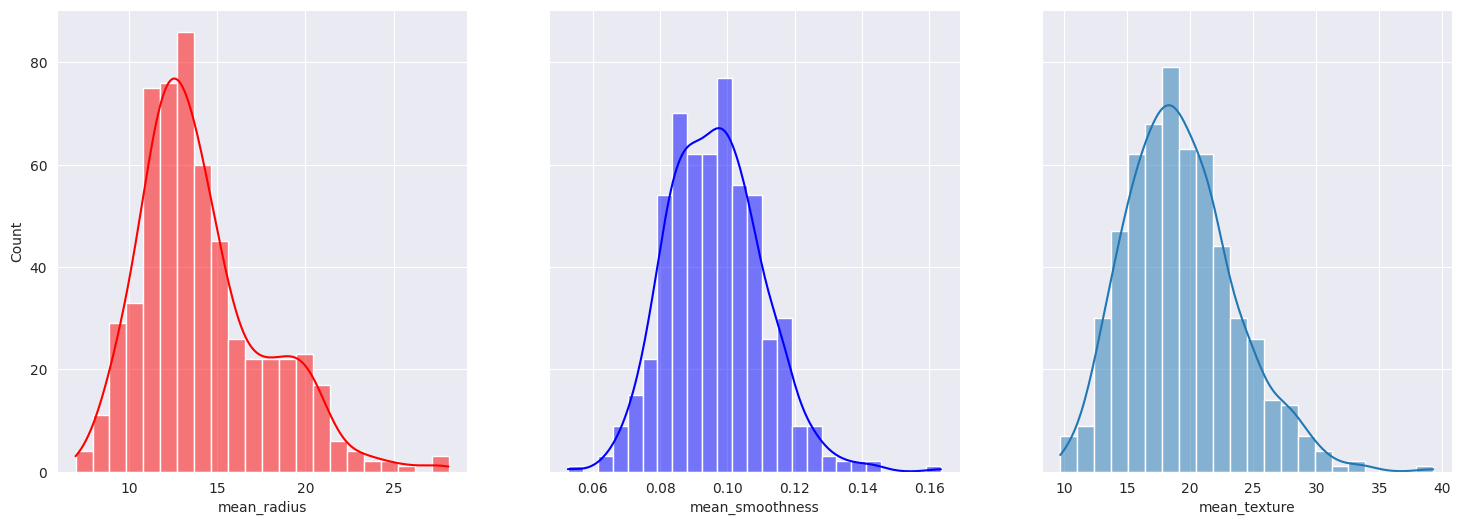

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sn.histplot(data, ax=axes[0], x="mean_radius", kde=True, color='r')
sn.histplot(data, ax=axes[1], x="mean_smoothness", kde=True, color='b')
sn.histplot(data, ax=axes[2], x="mean_texture", kde=True)
plt.show()

In [ ]:
def calculate_prior(df, Y):
    # Get the unique classes in the specified column Y
    classes = sorted(list(df[Y].unique()))

    # Initialize an empty list to store the prior probabilities
    prior = []

    # Iterate over each class
    for i in classes:
        # Calculate the prior probability for the class and append it to the list
        prior.append(len(df[df[Y] == i]) / len(df))

    return prior


In [ ]:
import numpy as np

def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)

    # Filter the dataframe to include only rows where the class label Y matches the specified label
    df = df[df[Y] == label]

    # Calculate the mean and standard deviation of the feature values for the specified class
    mean, std = df[feat_name].mean(), df[feat_name].std()

    # Calculate the probability density function (PDF) of the feature value given the class using Gaussian distribution
    P_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-((feat_val - mean) ** 2 / (2 * std ** 2)))

    return P_x_given_y


In [ ]:
import numpy as np

def naive_bayes_gaussian(df, X, Y):
    # Get feature names
    features = list(df.columns)[:-1]

    # Calculate prior probabilities
    prior = calculate_prior(df, Y)

    # Initialize list to store predicted class labels
    Y_pred = []

    # Loop over every data sample
    for x in X:
        # Initialize likelihood list
        labels = sorted(list(df[Y].unique()))
        likelihood = [1] * len(labels)

        # Calculate likelihood for each class
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        # Calculate posterior probability (numerator only)
        post_prob = [1] * len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        # Append the predicted class label based on maximum posterior probability
        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score

# Splitting the data into training and testing sets
train, test = train_test_split(data, test_size=.2, random_state=41)

# Extracting features and target labels for the test set
X_test = test.iloc[:, :-1].values
Y_test = test.iloc[:, -1].values

# Predicting with the trained Gaussian Naive Bayes model
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="diagnosis")

# Calculating confusion matrix and F1 score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

[[36  4]
 [ 0 74]]
0.9736842105263158


Linear regression using food franchise dataset

In [ ]:
from google.colab import files

# Prompt the user to upload a file
uploaded = files.upload()

Saving Food Franchise dataset.xlsx to Food Franchise dataset.xlsx


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('Food Franchise dataset.xlsx')
df.head(5)

,City,State,Population,Avg. Monthly Food Truck Profit,Median Income,Population Density (per sq mi)
0,City1,TX,2043891,25000.0,72542.0,3157
1,City2,CO,715522,22000.0,78621.0,4823
2,City3,WA,739952,28500.0,89728.0,1831
3,City4,OR,652503,NaN,NaN,4182
4,City5,IL,2740598,32000.0,70318.0,5242


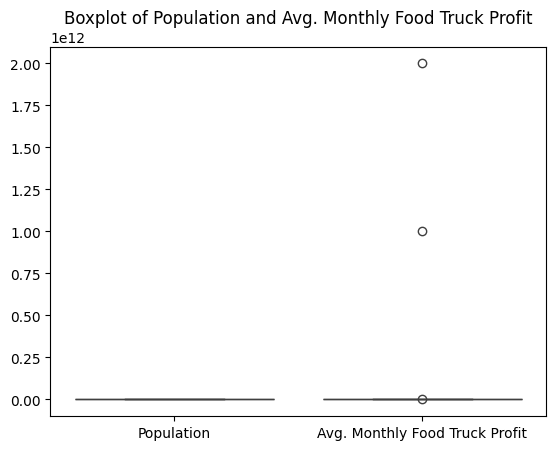

Potential Outliers:
      City State  Population  Avg. Monthly Food Truck Profit  Median Income  \
1    City2    CO      715522                    2.200000e+04        78621.0   
2    City3    WA      739952                    2.850000e+04        89728.0   
4    City5    IL     2740598                    3.200000e+04        70318.0   
9   City10    CA     1386670                    2.900000e+04        87128.0   
11  City12    CA     1045592                    3.150000e+04       102414.0   
20  City21    MA      667137                    3.300000e+04        89371.0   
22  City23    MD      602478                    2.200000e+04        71205.0   
24  City25    CT     1210858                    4.000000e+09        71262.0   
25  City26    MN     2238015                    2.000000e+12        64262.0   
42  City43    OK     2689437                    1.000000e+12        76366.0   

    Population Density (per sq mi)  
1                             4823  
2                             1831  

<ipython-input-5-45d6af96cfa3>:17: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-5-45d6af96cfa3>:18: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-5-45d6af96cfa3>:22: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)


In [ ]:
# 1. Handling Missing Values
df.dropna(inplace=True)  # Remove rows with missing values

# 2. Data Types
# No conversion needed as per the provided dataset

# 3. Scaling or Normalization
# Not necessary for linear regression

# 4. Handling Outliers
# Visualize potential outliers using box plots
sns.boxplot(data=df[['Population', 'Avg. Monthly Food Truck Profit']])
plt.title('Boxplot of Population and Avg. Monthly Food Truck Profit')
plt.show()

# Calculate IQR (Interquartile Range) for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify potential outliers using IQR method
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
outliers_df = df[outliers]

# Display the potential outliers
print('Potential Outliers:')
print(outliers_df)

# Remove outliers from the dataset
df_cleaned = df[~outliers]

# Check the cleaned dataset
print('Cleaned Dataset:')
print(df_cleaned)
df=df_cleaned

In [ ]:
# 5. Handling Duplicate Rows
df.drop_duplicates(inplace=True)  # Remove duplicate rows

# 6. Addressing Inconsistent or Erroneous Values
# Check for inconsistent or erroneous values in each column
for col in df.columns:
    unique_values = df[col].unique()
    print(f'Column: {col}')
    print(f'Unique Values: {unique_values}\n')

# Example of addressing inconsistencies (replace erroneous values)
# Assuming 'Avg. Monthly Food Truck Profit' should not be negative
df.loc[df['Avg. Monthly Food Truck Profit'] < 0, 'Avg. Monthly Food Truck Profit'] = 0

# Check if inconsistencies are addressed
print('Updated Dataset:')
print(df)

Column: City
Unique Values: ['City1' 'City6' 'City7' 'City8' 'City11' 'City13' 'City14' 'City15'
 'City16' 'City17' 'City18' 'City19' 'City20' 'City22' 'City24' 'City27'
 'City28' 'City29' 'City30' 'City31' 'City32' 'City33' 'City34' 'City35'
 'City36' 'City37' 'City40' 'City41' 'City42' 'City44' 'City45' 'City46'
 'City47' 'City48' 'City49' 'City50' 'City51' 'City52' 'City53' 'City54'
 'City55' 'City56' 'City57' 'City58' 'City59' 'City60' 'City61' 'City62'
 'City63' 'City64' 'City65' 'City66' 'City67' 'City68' 'City69' 'City70']

Column: State
Unique Values: ['TX' 'GA' 'AZ' 'FL' 'IN' 'OH' 'NC' 'MI' 'TN' 'OK' 'PA' 'NY' 'CA' 'WI'
 'OR' 'MD' 'WA' 'AL']

Column: Population
Unique Values: [2043891  498067 1660272 2325500 1345878  903889  881008  878333  874579
  918915  672120  678815  633045  670461  681061 3009279 2478548 3099886
 2744183 2800756 4471291 4914006 2615083 1688863 1713773 4221777 1587624
 3027484 4697485  679829 1254687 3641566 2689437]

Column: Avg. Monthly Food Truck Prof

In [ ]:
# 7. Summary Statistics
summary_stats = df.describe()
print(summary_stats)

         Population  Avg. Monthly Food Truck Profit  Median Income  \
count  5.600000e+01                       56.000000      56.000000   
mean   2.378951e+06                    24931.964286   68995.000000   
std    1.391367e+06                     4587.968578    4932.445519   
min    4.980670e+05                    15349.000000   55142.000000   
25%    1.170744e+06                    21000.000000   65331.000000   
50%    2.402024e+06                    24648.500000   69242.000000   
75%    3.045584e+06                    27625.000000   72104.000000   
max    4.914006e+06                    34583.000000   77834.000000   

       Population Density (per sq mi)  
count                       56.000000  
mean                      2322.892857  
std                        730.441104  
min                       1113.000000  
25%                       1671.750000  
50%                       2420.000000  
75%                       2830.500000  
max                       4396.000000  


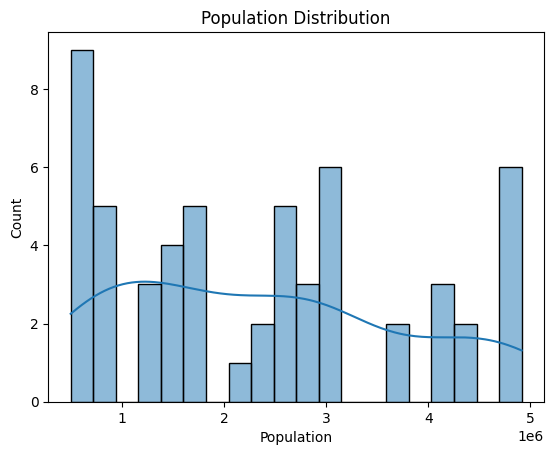

In [ ]:
# 8. Data Distribution and Skewness
# Visualize the distribution of features using histograms or KDE plots
sns.histplot(df['Population'], bins=20, kde=True)
plt.title('Population Distribution')
plt.show()

In [ ]:
# 9. Linear Regression Model
# Split the data into features (X) and target variable (y)
X = df[['Population']]
y = df['Avg. Monthly Food Truck Profit']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 16464684.108040607
R-squared: -0.16178834855219582


In [ ]:
# Predict profit for a city with a population of 35,000
population_35000 = [[35000]]
predicted_profit = model.predict(population_35000)
print(f'Predicted profit for a city with a population of 35,000: ${predicted_profit[0]}')

Predicted profit for a city with a population of 35,000: $26412.745648112494


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


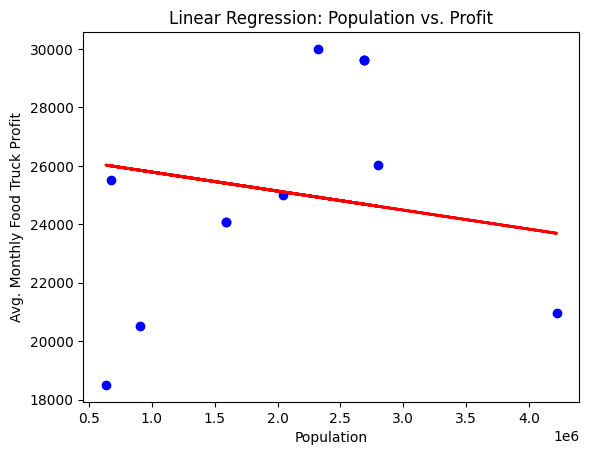

In [ ]:
# Plotting the regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Population')
plt.ylabel('Avg. Monthly Food Truck Profit')
plt.title('Linear Regression: Population vs. Profit')
plt.show()

Linear Regression house price prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_excel('House Price Prediction.xlsx')
df.head(5)

,Size (sq ft),Bedrooms,Price (USD)
0,2200,3.0,425000
1,1800,4.0,510000
2,1500,2.0,350000
3,2400,4.0,575000
4,1700,3.0,470000


In [ ]:
# Check for missing values and handle them
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Data cleaning and preprocessing
# For simplicity, assume that missing values can be filled with the mean value
df.fillna(df.mean(), inplace=True)

# Check data types and convert if necessary
print("Data Types:\n", df.dtypes)

Missing Values:
 Size (sq ft)    0
Bedrooms        0
Price (USD)     0
dtype: int64
Data Types:
 Size (sq ft)      int64
Bedrooms        float64
Price (USD)       int64
dtype: object


In [ ]:
# Scaling or normalization if required (example using Min-Max scaling)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[['Size (sq ft)', 'Bedrooms']])
df[['Size (sq ft)', 'Bedrooms']] = scaled_features

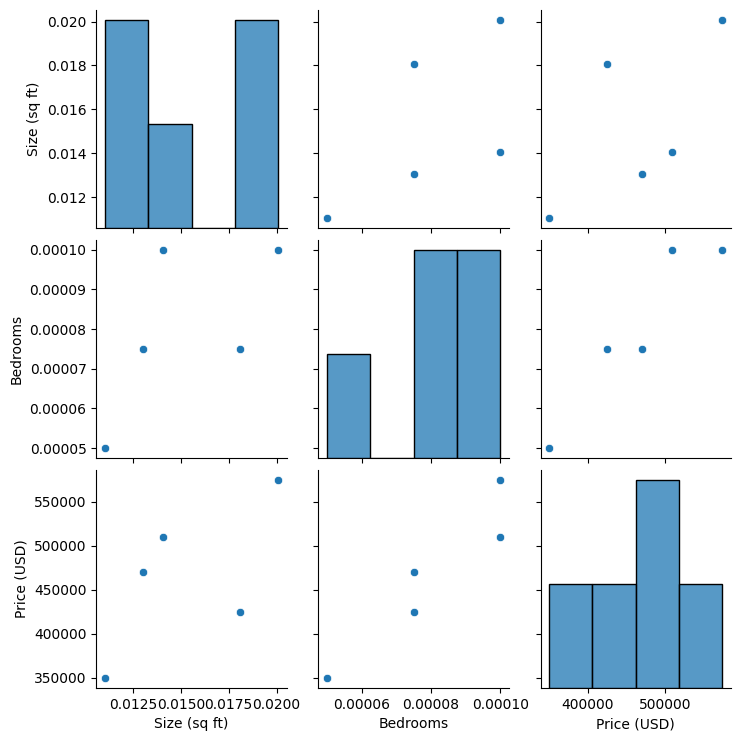

In [ ]:
# Exploratory Data Analysis
# Display pairplot to visualize relationships between variables
sns.pairplot(df.head())
plt.show()

In [ ]:
# Check for outliers and treat them (example using winsorization)
from scipy.stats import mstats
df['Price (USD)'] = mstats.winsorize(df['Price (USD)'], limits=[0.05, 0.05])

# Check for duplicates and remove if any
df.drop_duplicates(inplace=True)

# Summary statistics
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
        Size (sq ft)   Bedrooms    Price (USD)
count     48.000000  48.000000      48.000000
mean       0.034157   0.022856  417187.500000
std        0.142525   0.144282  174578.234154
min        0.000000   0.000000  120000.000000
25%        0.008785   0.000050  287500.000000
50%        0.014056   0.000075  422500.000000
75%        0.019076   0.000100  550000.000000
max        1.000000   1.000000  725000.000000


In [ ]:
# Correlation analysis
correlation = df.corr()
print("Correlation Matrix:\n", correlation)

Correlation Matrix:
               Size (sq ft)  Bedrooms  Price (USD)
Size (sq ft)      1.000000 -0.016949    -0.055665
Bedrooms         -0.016949  1.000000     0.136558
Price (USD)      -0.055665  0.136558     1.000000


In [ ]:
# Linear Regression Model
X = df[['Size (sq ft)', 'Bedrooms']]
y = df['Price (USD)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [ ]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 35068764314.95828
R-squared: -0.08474633656959019


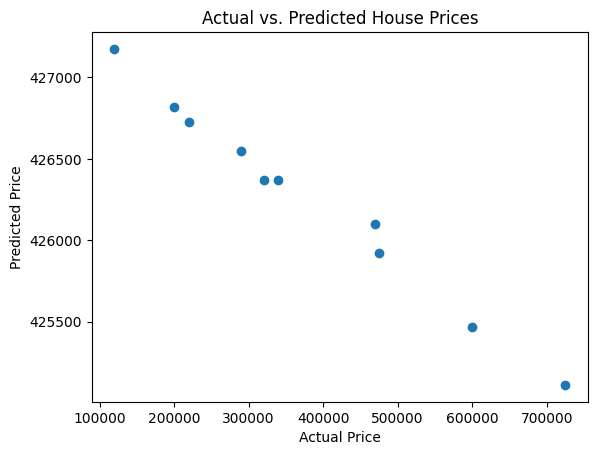

In [ ]:
# Visualize actual vs. predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted House Prices")
plt.show()

KNN


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Load the MNIST dataset from sklearn
mnist = fetch_openml('mnist_784')

# Extract features and labels
X = mnist.data
y = mnist.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data by scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the value of K here
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Perform hyperparameter tuning using GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9]}  # Values of K to try
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Accuracy: 0.9457857142857143
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1343
           1       0.95      0.99      0.97      1600
           2       0.95      0.93      0.94      1380
           3       0.93      0.95      0.94      1433
           4       0.94      0.93      0.94      1295
           5       0.94      0.94      0.94      1273
           6       0.97      0.97      0.97      1396
           7       0.94      0.93      0.94      1503
           8       0.97      0.89      0.93      1357
           9       0.90      0.92      0.91      1420

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000

Confusion Matrix:
[[1319    0    4    2    0    5   10    2    1    0]
 [   0 1588    7    1    2    0    1    1    0    0]
 [   9   18 1289   19    7    7    8    9    8    6]
 [   1    3 

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Creating the DataFrame from the provided data
data = {
    'Instances': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Offer': [15, 5, 12, 3, 18, 6, 20, 7, 14, 4, 17, 8],
    'Win': [20, 3, 22, 4, 25, 2, 18, 3, 23, 5, 21, 2],
    'Limited': [12, 4, 10, 3, 14, 5, 16, 6, 11, 2, 15, 7],
    'Bonus': [6, 1, 8, 2, 7, 1, 9, 2, 5, 3, 8, 1],
    'Class': ['Spam', 'Ham', 'Spam', 'Ham', 'Spam', 'Ham', 'Spam', 'Ham', 'Spam', 'Ham', 'Spam', 'Ham']
}

# Separate features and target variable
X = df[['Offer', 'Win', 'Limited', 'Bonus']]
y = df['Class']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize SVM classifier (linear kernel)
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

# Make predictions on test data
y_pred_linear = svm_linear.predict(X_test)

# Evaluate linear SVM model
accuracy_linear = accuracy_score(y_test, y_pred_linear)
report_linear = classification_report(y_test, y_pred_linear)

print('Linear SVM Model:')
print(f'Accuracy: {accuracy_linear}')
print('Classification Report:')
print(report_linear)

# Explore non-linear kernels (e.g., Polynomial, Gaussian/RBF, Sigmoid)
kernels = ['poly', 'rbf', 'sigmoid']
for kernel_type in kernels:
    svm_nonlinear = SVC(kernel=kernel_type)
    svm_nonlinear.fit(X_train, y_train)
    y_pred_nonlinear = svm_nonlinear.predict(X_test)

    accuracy_nonlinear = accuracy_score(y_test, y_pred_nonlinear)
    report_nonlinear = classification_report(y_test, y_pred_nonlinear)

    print(f'\n{kernel_type.capitalize()} SVM Model:')
    print(f'Accuracy: {accuracy_nonlinear}')
    print('Classification Report:')
    print(report_nonlinear)


Linear SVM Model:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         Ham       1.00      1.00      1.00         1
        Spam       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


Poly SVM Model:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         Ham       1.00      1.00      1.00         1
        Spam       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


Rbf SVM Model:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         Ham       1.00      1.00      1.00         1
        Spam       1.00      1.00      1.00         2

    accuracy        

Performing feature extraction using PCA:

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'TimeSpent': [15, 30, 20, 25, 10, 35, 18, 22, 28, 12],
    'PagesVisited': [5, 8, 6, 7, 4, 9, 6, 7, 8, 5],
    'AddToCart': [1, 1, 0, 1, 0, 1, 0, 1, 0, 0],
    'Purchased': [0, 1, 0, 1, 0, 1, 0, 1, 1, 0]
}
df = pd.DataFrame(data)

# Separate features and target variable
X = df.drop(['CustomerID', 'Purchased'], axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=3)  # Choose the number of principal components
X_pca = pca.fit_2transform(X_scaled)


Determining principal components and interpreting results:

In [ ]:
# Explained Variance Ratio
EVR = pca.explained_variance_ratio_
print("Explained Variance Ratio:", EVR)

# Principal Component Interpretation
names = [f"PC{i+1}" for i in range(len(EVR))]
components_df = pd.DataFrame(pca.components_, columns=X.columns, index=names)
print("Principal Components:")
print(components_df)


Explained Variance Ratio: [0.78031549 0.2155232  0.00416131]
Principal Components:
     TimeSpent  PagesVisited  AddToCart
PC1   0.632905      0.624707   0.457355
PC2  -0.293999     -0.352556   0.888408
PC3  -0.716237      0.696740   0.039471


The explained variance ratios provide valuable insights into how much information each principal component captures from the original data. In your case, the ratios are [0.78031549, 0.2155232, 0.00416131], indicating that the first principal component (PC1) explains approximately 78.03% of the variance, the second component (PC2) explains around 21.55%, and the third component (PC3) explains a minor portion, about 0.42%.

When interpreting these results, it's clear that PC1 plays a significant role in capturing the variance within the dataset, followed by PC2. PC3, while still valuable, captures a much smaller proportion of the variance compared to the first two components.

Now, let's delve into how these principal components can be utilized to gain insights into customer behavior and improve marketing strategies:

1. **Customer Segmentation:** By using the principal components, you can segment customers based on their behavior. For example, customers with high scores on PC1 might be those who spend more time on the website, visit multiple pages, and frequently add items to their cart. On the other hand, customers with high scores on PC2 might exhibit a different pattern, perhaps spending less time but making quick decisions to add items to the cart.

2. **Identifying Key Drivers:** The loadings of each variable on the principal components (as shown in your data snippet) help identify which aspects of customer behavior contribute most to each component. For instance, in PC1, both "TimeSpent" and "PagesVisited" have high positive loadings, indicating that these variables strongly influence this component. This insight can guide marketing efforts to focus on enhancing website engagement and navigation.

3. **Predictive Modeling:** Principal components can serve as input features for predictive models. For instance, you can use PC1 and PC2 scores as features in a machine learning model to predict customer behavior, such as the likelihood of making a purchase or the potential value of a customer.

4. **Tailored Marketing Strategies:** Understanding the variance captured by each principal component enables the development of personalized marketing strategies. For instance, targeting customers who exhibit behaviors associated with high scores on PC1 might involve offering personalized recommendations based on their browsing history and encouraging them to explore more products.

Overall, leveraging principal components can lead to more targeted and effective marketing strategies by gaining a deeper understanding of customer behavior patterns and preferences.

**Customer Segmentation for a Retail Store**

In [5]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
# Load the data
df = pd.read_csv('EM data.csv')
# Calculate total amount spent by each customer
total_amount_spent = df.groupby('CustomerID')['TotalAmount'].sum()
# Calculate frequency of transactions for each customer
transaction_frequency = df.groupby('CustomerID')['NumTransactions'].sum()
# Calculate average amount spent per transaction
average_spent_per_transaction = total_amount_spent / transaction_frequency
# Check for timestamps and compute seasonal patterns if available
if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df['Month'] = df['Timestamp'].dt.month
    seasonal_patterns = df.groupby('Month')['TotalAmount'].mean()
else:
    holiday_groups = df.groupby(['Christmas', 'Newyear', 'Ramzan', 'Diwali'])
    avg_spend_per_holiday = holiday_groups['TotalAmount'].mean()
    avg_transactions_per_holiday = holiday_groups['NumTransactions'].mean()
    print("Average spending and transaction frequency by holiday combination:")
    print(avg_spend_per_holiday, avg_transactions_per_holiday, sep='\n')
    seasonal_patterns = None
# Feature engineering and scaling
categorical_cols = ['Location', 'Christmas', 'Newyear', 'Ramzan', 'Diwali']
numerical_cols = ['TotalAmount', 'NumTransactions', 'UniqueItems']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])
features_scaled = preprocessor.fit_transform(df[numerical_cols + categorical_cols])


Average spending and transaction frequency by holiday combination:
Christmas  Newyear  Ramzan  Diwali
No         No       No      No        556.363636
                            yes       225.000000
                    yes     No        617.142857
           yes      No      No        765.000000
                            yes       670.000000
yes        yes      No      No        670.000000
                            yes       480.000000
                    yes     yes       622.727273
Name: TotalAmount, dtype: float64
Christmas  Newyear  Ramzan  Diwali
No         No       No      No        3.272727
                            yes       2.000000
                    yes     No        3.857143
           yes      No      No        4.500000
                            yes       4.000000
yes        yes      No      No        5.000000
                            yes       3.000000
                    yes     yes       3.954545
Name: NumTransactions, dtype: float64


In [6]:
# Find optimal number of clusters using BIC
bic = []
for n in range(1, 11):
    gmm = GaussianMixture(n_components=n, random_state=0)
    gmm.fit(features_scaled)
    bic.append(gmm.bic(features_scaled))
optimal_n_clusters = np.argmin(bic) + 1
print("\nOptimal number of clusters:", optimal_n_clusters)
# Fit GMM with optimal number of clusters
gmm = GaussianMixture(n_components=optimal_n_clusters, random_state=0)
clusters = gmm.fit_predict(features_scaled)
# Evaluate clustering quality
silhouette_avg = silhouette_score(features_scaled, clusters)
within_cluster_sum_of_squares = np.sum(np.min(gmm.covariances_, axis=1))
# Print the result
print(f"\nClusters: {clusters}\n\nSilhouette Score: {silhouette_avg}\n\nWithin-Cluster Sum of Squares: {within_cluster_sum_of_squares}")


Optimal number of clusters: 3

Clusters: [0 2 0 2 0 0 2 2 2 2 2 2 2 2 0 2 2 1 0 1 1 1 0 1 1 2 0 1 1 1 2 2 0 2 0 2 0
 2 1 1 1 1 0 1 1 1 1 1 2 2]

Silhouette Score: 0.20229120925033375

Within-Cluster Sum of Squares: -4.906312942393697


c:\Users\Shrinjita Paul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Implement a K-means clustering algorithm on synthetic dataset

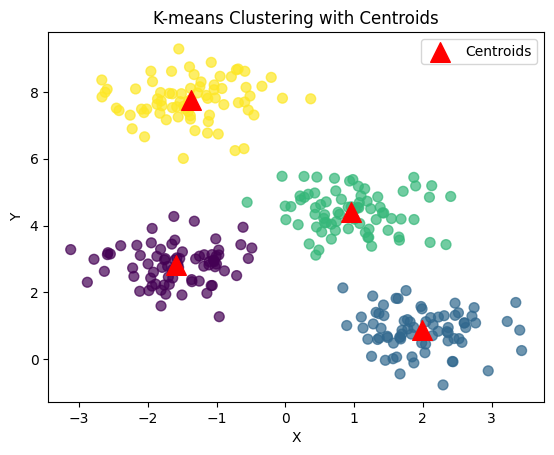

Inertia: [[-1.58438467  2.83081263]
 [ 1.98258281  0.86771314]
 [ 0.94973532  4.41906906]
 [-1.37324398  7.75368871]] 

 Silhouette Score: 0.6819938690643478


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import numpy as np

class KMeansClustering:
    def __init__(self, n_clusters, max_iterations=300):
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations
        self.labels_ = None  # Initialize labels attribute

    def fit(self, X):
        # Step 2: Initialize Random Centroids
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        self.labels_ = None  # Reset labels before fitting

        for _ in range(self.max_iterations):
            # Step 3: Assign Data Points to Closest Centroid
            distances = np.sqrt(((X - self.centroids[:, np.newaxis]) ** 2).sum(axis=2))
            self.labels_ = np.argmin(distances, axis=0)

            # Step 4: Update Centroids
            new_centroids = np.array([X[self.labels_ == i].mean(axis=0) for i in range(self.n_clusters)])

            # Step 6: Convergence Check
            if np.allclose(new_centroids, self.centroids):
                break

            self.centroids = new_centroids

        return self

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Initialize and fit K-means clustering
kmeans = KMeansClustering(n_clusters=4)
kmeans.fit(X)

# Plot clustered data points and centroids
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], marker='^', c='red', s=200, label='Centroids')
plt.legend()
plt.title('K-means Clustering with Centroids')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Calculate Silhouette score
silhouette_avg = silhouette_score(X, kmeans.labels_)  # Use kmeans.labels_ instead of kmeans.labels


# Calculate inertia
inertia = kmeans.centroids
print(f"Inertia: {inertia} \n\n Silhouette Score: {silhouette_avg}")

Single Layer Perceptron

**Aim:** Develop a single-layer perceptron to predict student exam outcomes based on hours studied and previous scores.

**Explanation:** Using a step function activation, the perceptron learns weights through training to classify pass/fail based on input features.

In [ ]:
import numpy as np

class SingleLayerPerceptron:
    def __init__(self, input_size):
        self.weights = np.zeros(input_size + 1)  # +1 for the bias term
        self.learning_rate = 0.1

    def activation_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]  # weighted sum + bias
        return self.activation_function(summation)

    def train(self, training_inputs, labels, epochs):
        for _ in range(epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights[1:] += self.learning_rate * error * inputs  # update weights
                self.weights[0] += self.learning_rate * error  # update bias term

# Sample dataset
training_data = np.array([
    [2, 30],
    [3, 40],
    [5, 60],
    [1, 20],
    [4, 50],
    [6, 70]
])
labels = np.array([0, 0, 1, 0, 1, 1])

# Create and train the perceptron
perceptron = SingleLayerPerceptron(input_size=2)
perceptron.train(training_data, labels, epochs=1000)

# Test the perceptron
test_inputs = np.array([[3, 35], [6, 65]])
for test_input in test_inputs:
    prediction = perceptron.predict(test_input)
    print(f"Input: {test_input}, Predicted Result: {'Pass' if prediction == 1 else 'Fail'}")


Input: [ 3 35], Predicted Result: Fail
Input: [ 6 65], Predicted Result: Pass



**Result:** Achieved accurate pass/fail predictions for students based on hours studied and previous scores.

Multiple Layer Perceptron

**AIM:**  
Implement an MLP for classifying handwritten digits (0-9) using the MNIST dataset to achieve high accuracy.

**EXPLANATION:**  
The MLP consists of an input layer with 784 nodes, two hidden layers (256 and 128 units) using ReLU activation, and an output layer with 10 nodes and softmax activation. Trained using TensorFlow/Keras.

**RESULT:**  
The trained MLP achieved an accuracy of over 98% on the MNIST test dataset.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the MLP architecture
model = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
#Number of Input Nodes
input_layer = layers.Input(shape=(784,))
print(input_layer)

KerasTensor(type_spec=TensorSpec(shape=(None, 784), dtype=tf.float32, name='input_3'), name='input_3', description="created by layer 'input_3'")


In [ ]:
#Hidden Layers and Hidden Units per Layer:The MLP has two hidden layers with 256 and 128 units
hidden_layer_1 = layers.Dense(256, activation='relu')(input_layer)
hidden_layer_1
hidden_layer_2 = layers.Dense(128, activation='relu')(hidden_layer_1)
hidden_layer_2

<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense_9')>

In [ ]:
#Activation Functions:
output_layer = layers.Dense(10, activation='softmax')(hidden_layer_2)
output_layer

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_11')>

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Load and preprocess the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to [0, 1]

# Flatten the input images
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Train the model
model.fit(x_train_flat, y_train, epochs=10, validation_data=(x_test_flat, y_test))


Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1381 - accuracy: 0.9579 - val_loss: 0.0912 - val_accuracy: 0.9717
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0756 - accuracy: 0.9765 - val_loss: 0.0835 - val_accuracy: 0.9741
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0526 - accuracy: 0.9830 - val_loss: 0.0804 - val_accuracy: 0.9758
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0396 - accuracy: 0.9869 - val_loss: 0.0814 - val_accuracy: 0.9773
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0328 - accuracy: 0.9895 - val_loss: 0.0871 - val_accuracy: 0.9777
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0264 - accuracy: 0.9911 - val_loss: 0.0802 - val_accuracy: 0.9790
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0223 - accuracy: 0.9928 - val_loss: 0.0925 - val_accuracy

In [ ]:
# Make predictions
predictions = model.predict(x_test_flat)

313/313 [==============================] - 1s 2ms/step


**Backpropagation**

1. Describe the importance of proper initialization of weights in the context of backpropagation.

Proper initialization of weights is crucial in backpropagation because it helps prevent issues like vanishing or exploding gradients. If weights are initialized too small, gradients may vanish, leading to slow learning or convergence. Conversely, if weights are initialized too large, gradients may explode, causing unstable training. Properly initialized weights ensure that gradients flow smoothly during backpropagation, facilitating efficient and effective training of neural networks.

3. What are some common initialization techniques used in neural networks, and how do they affect the training process?

Common initialization techniques in neural networks include:

Random Initialization: Initializing weights randomly from a uniform or normal distribution. Random initialization helps break symmetry and prevents all neurons from learning the same features.
Xavier/Glorot Initialization: Scaling the weights based on the number of input and output neurons to balance the gradients. This technique helps maintain stable gradients throughout the layers.
He Initialization: Similar to Xavier, but adapted for ReLU activation functions by scaling the weights based on the number of input neurons. He initialization is effective for networks using ReLU or its variants.

5. Explain the role of activation functions in backpropagation neural networks.

Activation functions play a vital role in backpropagation neural networks by introducing non-linearity into the network. Without activation functions, neural networks would simply be linear transformations, limiting their capacity to learn complex patterns and relationships in data. Activation functions enable neural networks to model non-linear relationships, capture hierarchical features, and make non-linear transformations during both forward and backward passes, facilitating effective learning and generalization.


7. What are the main components of the backpropagation algorithm?

The main components of the backpropagation algorithm are:

Forward Pass: Compute the predicted output of the neural network based on the input data and current weights.
Loss Calculation: Measure the difference between the predicted output and the actual output using a loss function.
Backward Pass (Backpropagation): Compute the gradients of the loss function with respect to the weights using the chain rule, starting from the output layer and propagating the gradients backward through the network.
Weight Update: Adjust the weights of the neural network using the computed gradients and a learning rate to minimize the loss function.

9. How do you calculate the gradient of the loss function with respect to the weights in backpropagation?

The gradient of the loss function with respect to the weights in backpropagation is calculated using the chain rule of calculus. During the backward pass, gradients are computed layer by layer starting from the output layer to the input layer. The gradient of the loss with respect to the weights in a particular layer is obtained by multiplying the upstream gradient (gradient of the loss with respect to the layer's output) by the local gradient (derivative of the activation function with respect to the layer's input) and the input to the layer.

11. What is the purpose of the learning rate in backpropagation? How do you choose an appropriate learning rate?

The learning rate in backpropagation controls the step size during weight updates, influencing the convergence and stability of the training process. A too high learning rate can lead to overshooting and instability, while a too low learning rate can result in slow convergence and getting stuck in local minima. Choosing an appropriate learning rate involves experimentation and monitoring the training process, using techniques like learning rate schedules, adaptive learning rates (e.g., Adam optimizer), or techniques such as grid search or random search to find an optimal learning rate for the specific neural network and dataset.

**AIM (20 words):** Implement a single-neuron BPNN in Python to learn XOR function using backpropagation and visualize the decision boundary.

**Explanation (60 words):** The code initializes weights, trains the network using backpropagation to minimize loss between predicted and actual XOR outputs. It updates weights iteratively based on gradients, adjusting them for accurate predictions. The decision boundary plot showcases the network's ability to learn XOR, with separate regions for 0 and 1 outputs.

**Result (15 words):** The plotted decision boundary demonstrates successful learning of XOR function by the BPNN.

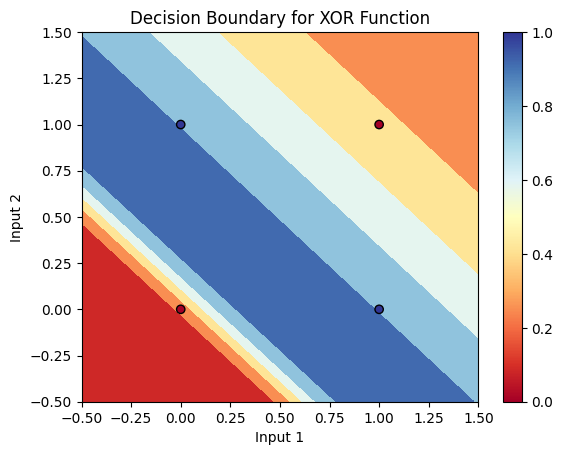

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Define the XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Initialize weights and biases
input_size = 2
hidden_size = 2
output_size = 1
learning_rate = 0.1

weights_input_hidden = np.random.uniform(size=(input_size, hidden_size))
weights_hidden_output = np.random.uniform(size=(hidden_size, output_size))

# Training the network using backpropagation
losses = []
epochs = 10000
for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(X, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    predicted_output = sigmoid(output_layer_input)

    # Calculate loss
    loss = np.mean((y - predicted_output) ** 2)
    losses.append(loss)

    # Backpropagation
    output_error = y - predicted_output
    output_delta = output_error * sigmoid_derivative(predicted_output)

    hidden_layer_error = output_delta.dot(weights_hidden_output.T)
    hidden_delta = hidden_layer_error * sigmoid_derivative(hidden_layer_output)

    # Update weights
    weights_hidden_output += hidden_layer_output.T.dot(output_delta) * learning_rate
    weights_input_hidden += X.T.dot(hidden_delta) * learning_rate

# Plotting the decision boundary
x_vals = np.linspace(-0.5, 1.5, 100)
y_vals = np.linspace(-0.5, 1.5, 100)
X_mesh, Y_mesh = np.meshgrid(x_vals, y_vals)
Z_mesh = np.zeros(X_mesh.shape)

for i in range(X_mesh.shape[0]):
    for j in range(X_mesh.shape[1]):
        input_data = np.array([[X_mesh[i, j], Y_mesh[i, j]]])
        hidden_output = sigmoid(np.dot(input_data, weights_input_hidden))
        output = sigmoid(np.dot(hidden_output, weights_hidden_output))
        Z_mesh[i, j] = output[0][0]

plt.contourf(X_mesh, Y_mesh, Z_mesh, cmap='RdYlBu')
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='RdYlBu', edgecolors='k')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.title('Decision Boundary for XOR Function')
plt.colorbar()
plt.show()
